# Assignment 1 - Image Classification

This notebook contains the required task for the first assignment of the Software for Advanced Machine Learning course. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier, from loading and inspecting the dataset to training a **pre-trained** Convolutional Neural Network architecture. The sections are to guide you but you do not have to follow that specific order. 

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [Canvas](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Rules and Comments
- From the list of datasets and architectures listed in canvas, each student was atributed **1 dataset and 1 architecture** to use within this assignment. Please confirm yours in the Canvas assignment's description. 
- This is an DL class so to pass the homework you do have to implement a working classifier, just loading the data or having a "random-guess" performance is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course). Remember that you will have to defend the assignment at the end of the semester.
- **Deadline is March 25**
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID below for easier identification.

**Name: Tshifaro Justin Ndivhuwo**  
**Neptun ID: SUQG0J** 

## Task description
Your task is to train an already pretrained Convolutional Neural Network architecture on a dataset, both given in canvas. The datasets contain images as input and class labels as target, thus you have to solve a Supervised Machine Learning Classification problem. 

The dataset shoud be divided into train, validation and test set, for which results should be presented for all.

You can either train the architecture you were given without changing its layers, or you can add more layers, if you believe it increases the accuracy. There is no expected percentage of accuracy, but **your accuracy should be better than random guessing and your loss has to decrease throughout the epochs**. We expect you to show visualisations (any of the following: matplotlib, seaborn, tensorboard, ...) of the accuracy and loss and use Early stopping while training your network.



## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [ ]:
import os    
import torch 
import torchvision
import pandas as pd  
import numpy as np  
from torch.utils.data import Dataset, random_split, DataLoader  
from PIL import Image  
import torchvision.models as models  
import torchvision.transforms as transforms  
from torchvision import datasets  
import torch.nn.functional as F  
import torch.nn as nn  
from torchvision.utils import make_grid  
from tqdm.notebook import tqdm
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt  

%matplotlib inline

## 1. Dataset 
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

#### Loading the dataset
Show some images and labels of your dataset

In [ ]:
!pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

os.environ['KAGGLE_USERNAME'] = "justintshifaro"
os.environ['KAGGLE_KEY'] = "a543d36985cabe549a629bba7cb36668"

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d itsahmad/indoor-scenes-cvpr-2019

100% 2.34G/2.34G [00:16<00:00, 237MB/s]
100% 2.34G/2.34G [00:16<00:00, 156MB/s]


In [ ]:
!unzip indoor-scenes-cvpr-2019.zip

Streaming output truncated to the last 5000 lines.
  inflating: indoorCVPR_09/Images/studiomusic/solarstudio.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio14.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio16.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio2.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio21.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio87.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio99.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_1.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_2.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_a.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_overall.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_pic_for_website.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studiomusic.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/susustudio.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/trabajo_238115785.jpg 

#### Splitting the dataset

In [ ]:
data_dir = "/content/indoorCVPR_09/Images"

classes = os.listdir(data_dir)
print(classes)

['children_room', 'hospitalroom', 'bakery', 'gameroom', 'classroom', 'bar', 'auditorium', 'prisoncell', 'dentaloffice', 'buffet', 'shoeshop', 'laundromat', 'stairscase', 'nursery', 'deli', 'hairsalon', 'greenhouse', 'poolinside', 'bathroom', 'movietheater', 'elevator', 'cloister', 'kindergarden', 'gym', 'pantry', 'closet', 'waitingroom', 'florist', 'restaurant_kitchen', 'mall', 'corridor', 'clothingstore', 'operating_room', 'concert_hall', 'laboratorywet', 'toystore', 'artstudio', 'garage', 'lobby', 'casino', 'inside_subway', 'jewelleryshop', 'videostore', 'inside_bus', 'library', 'bowling', 'computerroom', 'subway', 'museum', 'warehouse', 'dining_room', 'kitchen', 'restaurant', 'fastfood_restaurant', 'grocerystore', 'winecellar', 'locker_room', 'livingroom', 'bookstore', 'church_inside', 'bedroom', 'airport_inside', 'tv_studio', 'trainstation', 'studiomusic', 'office', 'meeting_room']


In [ ]:
mean , std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
transformations = transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize((224,224),interpolation=Image.NEAREST),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

dataset = ImageFolder(data_dir, transform = transformations)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:288: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [ ]:
len(dataset)

15620

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
train_data, valid_data, test_data = random_split(dataset, [11500, 3000, 1120])
len(train_data), len(valid_data), len(test_data)

(11500, 3000, 1120)

In [ ]:
batch_size = 20

train_dl = DataLoader(train_data,batch_size=batch_size,shuffle=True, num_workers=2)
valid_dl = DataLoader(valid_data,batch_size=batch_size, num_workers=2)
test_dl = DataLoader(test_data,batch_size=batch_size,num_workers=2)

In [ ]:
def denormalize(images, means, stds):
    if len(images.shape) == 3:
        images = images.unsqueeze(0)
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means
    
def show_image(img_tensor, label):
    print('Label:', train_data.classes[label], '(' + str(label) + ')')
    img_tensor = denormalize(img_tensor, mean, std)[0].permute((1, 2, 0))
    plt.imshow(img_tensor)

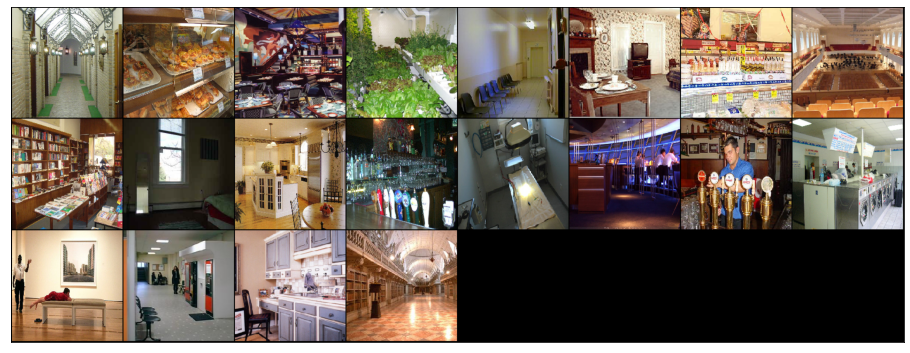

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 16))
        ax.set_xticks([]); ax.set_yticks([])
        images = denormalize(images[:64], mean, std)
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break
show_batch(train_dl)

#### Pre-processing the dataset

In [ ]:
# ADD YOUR CODE HERE

## 2. Convolutional Neural Network Architecture
Load the CNN architecture you were given using pretrained weights. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results.

#### Load the architecture

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:

classes

['children_room',
 'hospitalroom',
 'bakery',
 'gameroom',
 'classroom',
 'bar',
 'auditorium',
 'prisoncell',
 'dentaloffice',
 'buffet',
 'shoeshop',
 'laundromat',
 'stairscase',
 'nursery',
 'deli',
 'hairsalon',
 'greenhouse',
 'poolinside',
 'bathroom',
 'movietheater',
 'elevator',
 'cloister',
 'kindergarden',
 'gym',
 'pantry',
 'closet',
 'waitingroom',
 'florist',
 'restaurant_kitchen',
 'mall',
 'corridor',
 'clothingstore',
 'operating_room',
 'concert_hall',
 'laboratorywet',
 'toystore',
 'artstudio',
 'garage',
 'lobby',
 'casino',
 'inside_subway',
 'jewelleryshop',
 'videostore',
 'inside_bus',
 'library',
 'bowling',
 'computerroom',
 'subway',
 'museum',
 'warehouse',
 'dining_room',
 'kitchen',
 'restaurant',
 'fastfood_restaurant',
 'grocerystore',
 'winecellar',
 'locker_room',
 'livingroom',
 'bookstore',
 'church_inside',
 'bedroom',
 'airport_inside',
 'tv_studio',
 'trainstation',
 'studiomusic',
 'office',
 'meeting_room']

In [ ]:
resnet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

#### Define your optimizer and loss function

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(dataset.classes))

model_ft = model_ft.to(device)

In [ ]:
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchsummary import summary
summary(model_ft, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=0.9)

#### Train your network

In [ ]:
class EarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=3, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = './cifar_best_net.pth'

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            torch.save(model_ft.state_dict(), self.best_model)
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [ ]:
early_stopping = EarlyStopping()

#### Show results (accuracy and loss) on training and validation sets

In [ ]:
def evaluate():
  running_loss = 0.0
  
  with torch.no_grad():
    for i, data in enumerate(valid_dl, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model_ft(inputs)
      loss = criterion(outputs, labels)
      running_loss += loss.item()
  val_loss = running_loss / len(valid_dl)
  print('val loss: %.3f' % (val_loss))
  return val_loss


def eval_acc(train=False):
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      loader = train_dl if train else valid_dl
      for data in loader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)
          # calculate outputs by running images through the network
          outputs = model_ft(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  
  print('Accuracy of the network on the %s images: %d %%' % (
      'train' if train else 'test', 100 * correct / total))

## 3. Conclusion (Evaluation)
Load your trained CNN and evaluate it on the test set. Show some predictions on the test set (3 is enough) by ploting the image and printing the prediction and ground truth.

How good are your results? Do you think the network is overfitted or underfitted? If yes, what do you think lead to that? If not, justify.

#### Evaluate your model

In [ ]:
def train():
  NUM_EPOCHS = 15
  for epoch in range(NUM_EPOCHS):  # loop over the dataset multiple times
      print(f'Epoch {epoch+1}:')
      running_loss = 0.0
      for i, data in enumerate(train_dl, 0):
        
          inputs, labels = data[0].to(device), data[1].to(device) #set for GPU if available

          # zero the parameter gradients
          optimizer_ft.zero_grad()

          # forward + backward + optimize
          outputs = model_ft(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer_ft.step()

          # print statistics
          running_loss += loss.item()
          if i % 250 == 0 and i!= 0: 
              print(f'Iteration {i}, loss = {(running_loss / 250):.3f}')
              running_loss = 0.0

      val_loss = evaluate()
      eval_acc()
      early_stopping(val_loss)
      if early_stopping.early_stop:
          break

  print('Finished Training')

#### Show some predictions

In [ ]:
train()

Epoch 1:
Iteration 250, loss = 3.054
Iteration 500, loss = 1.968
val loss: 1.493
Accuracy of the network on the test images: 60 %
Epoch 2:
Iteration 250, loss = 1.268
Iteration 500, loss = 1.106
val loss: 1.130
Accuracy of the network on the test images: 68 %
Epoch 3:
Iteration 250, loss = 0.753
Iteration 500, loss = 0.738
val loss: 1.016
Accuracy of the network on the test images: 70 %
Epoch 4:
Iteration 250, loss = 0.476
Iteration 500, loss = 0.455
val loss: 0.960
Accuracy of the network on the test images: 72 %
Epoch 5:
Iteration 250, loss = 0.278
Iteration 500, loss = 0.270
val loss: 0.947
Accuracy of the network on the test images: 73 %
Epoch 6:
Iteration 250, loss = 0.156
Iteration 500, loss = 0.166
val loss: 0.943
Accuracy of the network on the test images: 73 %
Epoch 7:
Iteration 250, loss = 0.109
Iteration 500, loss = 0.103
val loss: 0.946
Accuracy of the network on the test images: 73 %
INFO: Early stopping counter 1 of 3
Epoch 8:
Iteration 250, loss = 0.079
Iteration 500, lo

In [ ]:
PATH = '/content/indoorCVPR_09/Images.pth'
torch.save(model_ft.state_dict(), PATH)

In [ ]:
def predict_image(image, model_ft):
    xb = image.unsqueeze(0).to(device)
    yb = model_ft(xb)
 
    prob, predicted  = torch.max(yb, dim=1)
    return dataset.classes[predicted[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: bathroom , Predicted: museum


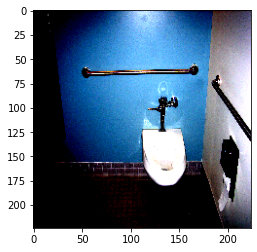

In [ ]:
image, label = test_data[800]
plt.imshow(image.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(image, model_ft))

#### Answer the questions

The accuracy is good but The model is Overfitting becuase it perfoms well on training data but not on test data.
The accuracy is good. The validation loss is also going down in most itteration
